#1. Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!ls -al '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap2_데이터분석기초/data'

total 2171732
-rw------- 1 root root    337847 May 20 08:04 data_202001.csv
-rw------- 1 root root    314682 May 20 08:00 data_202002.csv
-rw------- 1 root root    335953 May 20 07:59 data_202003.csv
-rw------- 1 root root    988308 May 20 08:10 data_2020.csv
-rw------- 1 root root 783889122 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202001
-rw------- 1 root root 699429059 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202002
-rw------- 1 root root 738556069 May 20 05:49 TCS_%EC%98%81%EC%97%85%EC%86%8C%EA%B0%84%ED%86%B5%ED%96%89%EC%8B%9C%EA%B0%84_1%EC%8B%9C%EA%B0%84_1%EA%B0%9C%EC%9B%94_202003


#2. Korean Characters

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [ ]:
import pandas as pd

In [ ]:
# load a file
file = '/gdrive/My Drive/Colab Notebooks/자율주행_스터디/Chap2_데이터분석기초/data/data_2020.csv'
data = pd.read_csv(file)

In [ ]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37356 entries, 0 to 37355
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37356 non-null  int64
 1   집계시      37356 non-null  int64
 2   출발영업소코드  37356 non-null  int64
 3   도착영업소코드  37356 non-null  int64
 4   통행시간     37356 non-null  int64
 5   요일       37356 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. 집계

In [ ]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [ ]:
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [ ]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [ ]:
data_06_22_counting

14    1766
12    1758
15    1755
13    1754
11    1744
10    1725
16    1724
17    1719
9     1703
18    1666
8     1662
19    1628
20    1611
7     1585
21    1559
22    1505
6     1440
Name: 집계시, dtype: int64

In [ ]:
x = data_06_22_counting.index

In [ ]:
x = [str(i) for i in x]

In [ ]:
x

['14',
 '12',
 '15',
 '13',
 '11',
 '10',
 '16',
 '17',
 '9',
 '18',
 '8',
 '19',
 '20',
 '7',
 '21',
 '22',
 '6']

In [ ]:
y = data_06_22_counting.values

In [ ]:
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


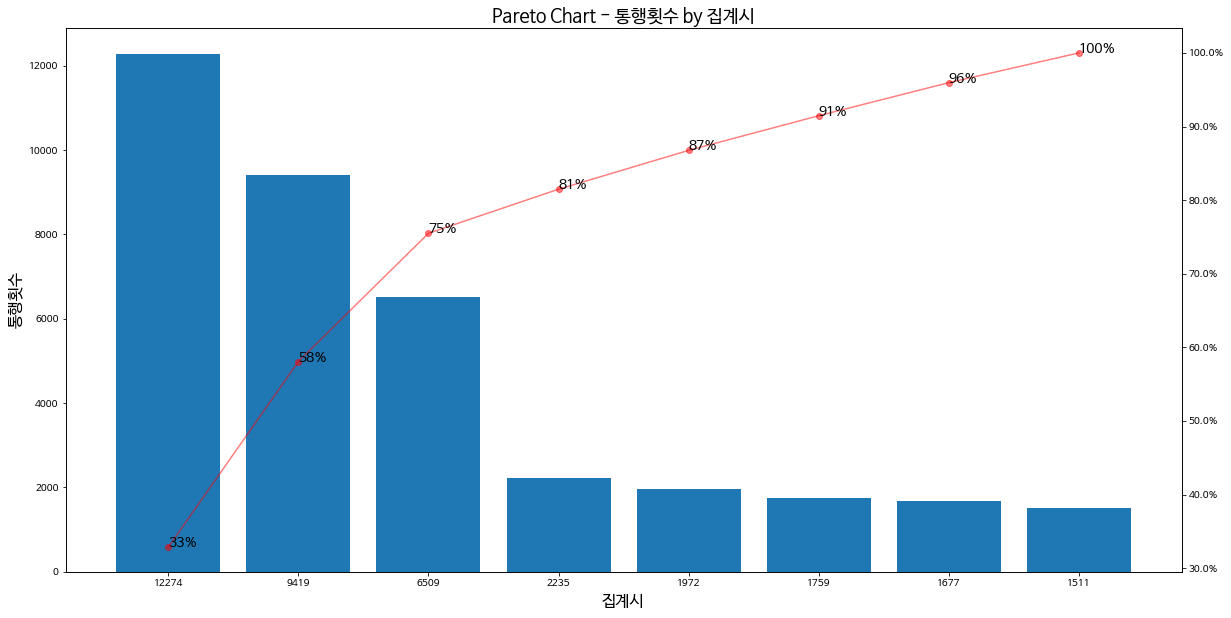

In [72]:
# configure figure size
fig, barChart = plt.subplots(figsize=(20,10))

# create bar chart
barChart.bar(x, y)

# create line chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)

# create right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])

# create annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
  lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)

# generate labels and title
barChart.set_xlabel('집계시', fontdict={'size':16})
barChart.set_ylabel('통행횟수', fontdict={'size':16})
plt.title('Pareto Chart - 통행횟수 by 집계시', fontsize=18)

# show plt
plt.show()

#5. 도착영업소코드

In [59]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [60]:
data_destination_counting

105    12274
110     9419
115     6509
140     2235
130     1972
135     1759
125     1677
120     1511
Name: 도착영업소코드, dtype: int64

In [61]:
x = data_destination_counting

In [62]:
x = [str(i) for i in x]

In [64]:
y = data_destination_counting.values

In [67]:
ratio = y / y.sum()
ratio_sum = ratio.cumsum()

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


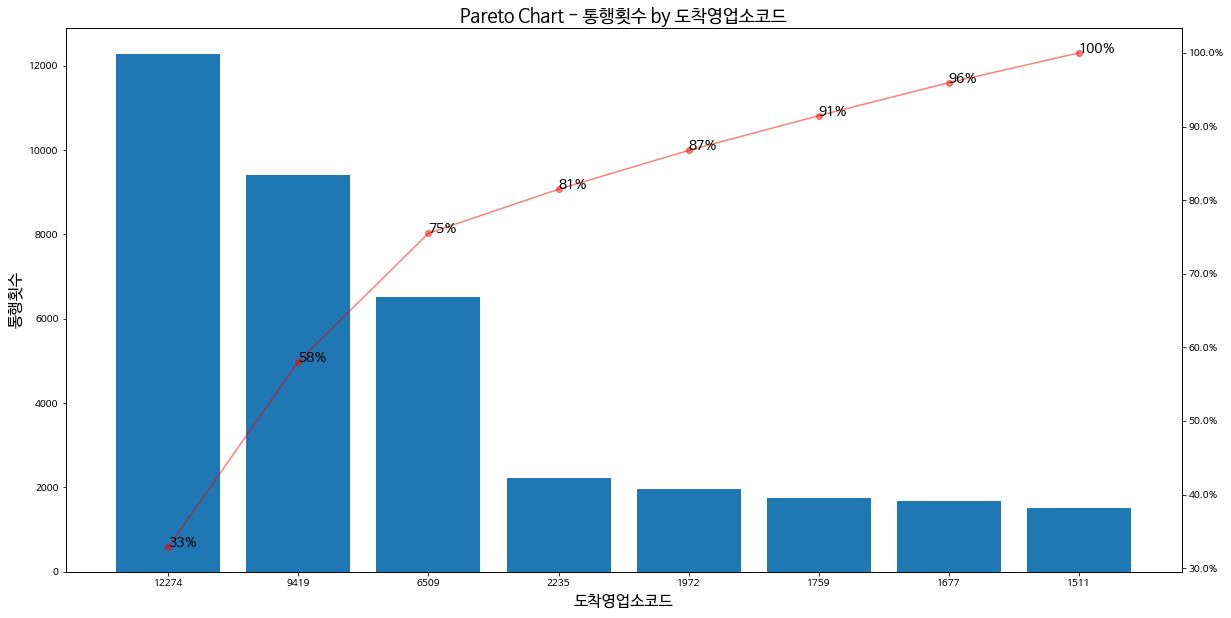

In [71]:
# configure figure size
fig, barChart = plt.subplots(figsize=(20,10))

# create bar chart
barChart.bar(x, y)

# create line chart
lineChart = barChart.twinx()
lineChart.plot(x, ratio_sum, '-ro', alpha=0.5)

# create right side labels
ranges = lineChart.get_yticks()
print(ranges)
lineChart.set_yticklabels(['{:,.1%}'.format(x) for x in ranges])

# create annotations on line chart
ratio_sum_percentages = ['{0:.0%}'.format(x) for x in ratio_sum]
for i, txt in enumerate(ratio_sum_percentages):
  lineChart.annotate(txt, (x[i], ratio_sum[i]), fontsize=14)

# generate labels and title
barChart.set_xlabel('도착영업소코드', fontdict={'size':16})
barChart.set_ylabel('통행횟수', fontdict={'size':16})
plt.title('Pareto Chart - 통행횟수 by 도착영업소코드', fontsize=18)

# show plt
plt.show()